<a href="https://colab.research.google.com/github/sieun-Bae/Deep_Learning/blob/master/MNIST%20data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



### Instructions ###
Before you start working on this assignment:
1.   Please choose "File -> Save a copy in Drive..." and then work with the copied file in your Drive. THIS FILE IS <u>NOT</u> EDITABLE.
2.   The copied file should be loaded automatically, otherwise, open it from your Google Drive's Colab Notebooks folder. The file should be called "Copy of Assignment1.ipynb"
3.   If you do not see the header menus (File, Edit, View, etc.) click on the arrow beside "Editing" on the top right of the file.
4.   Change the filename to your_initial/student_number-Assignment1.ipynb (e.g. GN-Assignment1.ipynb).
5.   Connect to a remote host and Change Runtime's Hardware Accelarator type to GPU.






### Import libraries

In [0]:
import tensorflow as tf
from tensorflow import keras

### Q1. Load the MNIST data which is available in tf.keras API into training and test sets.

In [0]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

### Q2. View the first image in the training set and see its pixel values, class category and graphical representation



5


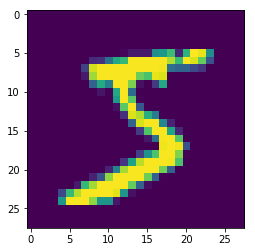

In [29]:
import matplotlib.pyplot as plt

print(train_labels[0])
plt.imshow(train_images[0])

### What is the class label of the first image in the training set?

```
5
```


### Q3. The images are 28 by 28 in greyscale. Enter any modifications that you would make to the images in the code cell below. Leave it blank if you think no modifications are necessary.

In [0]:
# greyscale, nolmalize the data to get the value between 0 to 1. 
train_images = train_images / 255.0
test_images = test_images / 255.0

### Q4. Define a neural network using the Sequential() method in keras. Decide how the input, output and hidden layers should be configured.

In [0]:
#flatten the input data, and the number of categories is 10, so the output layer should get 10 neurons.
#choosed relu and softmax function 
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)), #input layer
    keras.layers.Dense(256, activation = tf.nn.relu), #hidden layer
    keras.layers.Dense(10, activation = tf.nn.softmax) #output layer
])

### Q5. Compile the model you defined with a suitable loss function and optimiser within model.compile().


In [0]:
model.compile(optimizer = tf.train.AdamOptimizer(),
             loss= 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

### Ensure that training stops when 99% level of accuracy is reached with an exit message “Reached 99% accuracy, stopping”. Write a method that will stop training when this level of accuracy is reached.  

In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>=0.99):
      print('\nReached 99% accuracy, stopping.')
      self.model.stop_training = True

### Q6. Train your model using model.fit() keeping in mind that training shoukd stop when 99% accuracy is reached, otherwise it should stop after 10 iterations.

In [34]:
callbacks = myCallback()
model.fit(train_images, train_labels, epochs = 10, callbacks = [callbacks])

Epoch 1/10
60000/60000 [==============================] - 6s 93us/sample - loss: 0.2283 - acc: 0.9331
Epoch 2/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.0941 - acc: 0.9711
Epoch 3/10
60000/60000 [==============================] - 6s 92us/sample - loss: 0.0622 - acc: 0.9814
Epoch 4/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.0439 - acc: 0.9863
Epoch 5/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.0334 - acc: 0.9897
Epoch 6/10
59520/60000 [============================>.] - ETA: 0s - loss: 0.0258 - acc: 0.9914
Reached 99% accuracy, stopping.
60000/60000 [==============================] - 5s 90us/sample - loss: 0.0258 - acc: 0.9914


### Q7. Were you able to train a network to achieve 99% accuracy within 10 iterations? If yes, what were the design choices you made in order for this level to be achieved?

```
Yes.
I set 256 neurons in hidden layer, relu, softmax functions to set up model.
Also I compiled with Adamoptimizer, and sparse categorical crossentropy loss function.
```


### Q8. Evaluate your model’s performance on the test set.


In [35]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 69us/sample - loss: 0.0707 - acc: 0.9803


[0.07065145837523741, 0.9803]

### Q9. How many images are contained in the training set and how many in the test set?

```
Training set: 60,000 images
Test set: 10,000 images
```


In [36]:
print(len(train_images))
print(len(test_images))

60000
10000


### Q10. Remove any hidden layers from your neural network (comment out the code for the hidden layer(s) for now) so your model should only have one input layer and one output layer. Retrain the model. Can the neural network still classify these hand-written digits? Explain if it would be better to add hidden layer(s) or not for this image classification problem.

```
NN without hidden layer "can" still classify hand written digits with loss: 0.2659 / acc: 0.9279.
However if we train the model by adding hidden layer(s), it will perform much better than the previous one, e.g. adding one hidden layer with 256 neurons with relu activation function, loss: 0.0711 / acc: 0.9813
```


In [0]:
#model which is descripted below is trained without hidden layer. 
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)), #input layer
    keras.layers.Dense(10, activation = tf.nn.softmax) #output layer
])

In [0]:
model.compile(optimizer = tf.train.AdamOptimizer(),
             loss= 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [39]:
callbacks = myCallback()
model.fit(train_images, train_labels, epochs = 10, callbacks = [callbacks])

Epoch 1/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.4658 - acc: 0.8785
Epoch 2/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.3030 - acc: 0.9157
Epoch 3/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.2838 - acc: 0.9207
Epoch 4/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.2729 - acc: 0.9234
Epoch 5/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2666 - acc: 0.9256
Epoch 6/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.2620 - acc: 0.9269
Epoch 7/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2586 - acc: 0.9286
Epoch 8/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2555 - acc: 0.9288
Epoch 9/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2530 - acc: 0.9298
Epoch 10/10
60000/60000 [==============================] - 5s 83us/sample - loss: 

In [40]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 63us/sample - loss: 0.2688 - acc: 0.9249


[0.2688058203756809, 0.9249]

In [41]:
classification = model.predict(test_images)
print(classification[0])
max(classification[0])

[3.9377440e-07 1.5019110e-12 1.2570055e-06 3.4324678e-03 1.9239705e-07
 2.4299474e-05 4.0433429e-12 9.9631268e-01 8.9747773e-06 2.1971711e-04]


0.9963127

In [42]:
print(test_labels[0])

7


*Please restore your neural network to what it was up to Q7, i.e. with an accuracy of 99%, save your file and submit it via iCampus Assignment interface.*